# Olympics Data Analysis (1896–2021)

![Olympic Rings](https://upload.wikimedia.org/wikipedia/commons/5/5c/Olympic_rings_without_rims.svg)


Welcome to a comprehensive exploration of Olympic history spanning from the inaugural 1896 Games to the Tokyo 2021 Summer Olympics.  
In this notebook, we will perform both basic and advanced analyses, encompassing data cleaning, visualization, and interactive exploration.  
By the end, you will understand trends in medal counts, gender participation, sport diversity, and more.

## Import Required Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline
sns.set(style='whitegrid')

## Load Dataset

In [14]:
df = pd.read_csv('.\data\olympics_data.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\91962\AppData\Local\Temp\ipykernel_18524\1012590944.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('.\data\olympics_data.csv')


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Data Cleaning

In [15]:
df_medals = df.dropna(subset=['Medal'])
df_medals['Year'] = df_medals['Year'].astype(int)

C:\Users\91962\AppData\Local\Temp\ipykernel_18524\1980881924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medals['Year'] = df_medals['Year'].astype(int)


## Top 10 Countries by Total Medals

A static bar chart showing which National Olympic Committees (NOC) have won the most medals.

C:\Users\91962\AppData\Local\Temp\ipykernel_18524\550391974.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




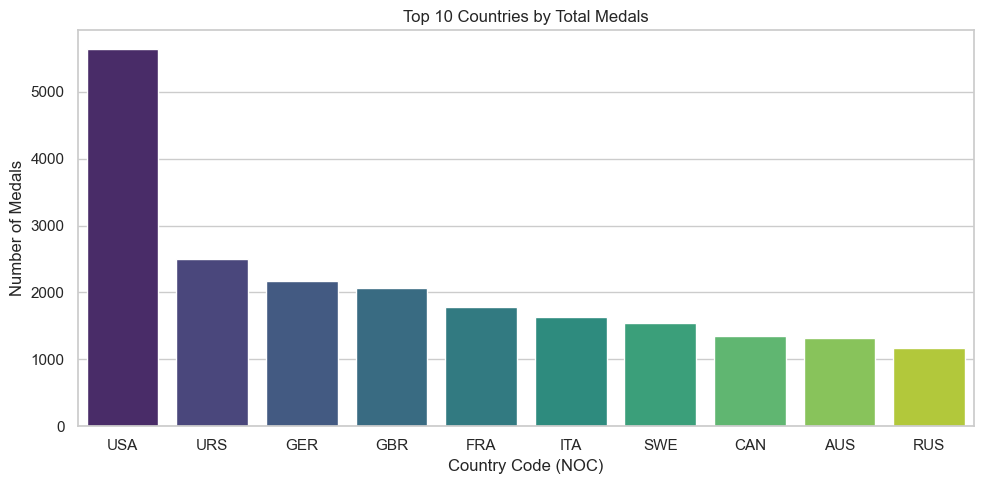

In [26]:
top_countries = df_medals['NOC'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Country Code (NOC)')
plt.ylabel('Number of Medals')
plt.tight_layout()
plt.show()

## Total Medals Over the Years
A static line plot of the total number of medals awarded each Olympic year.

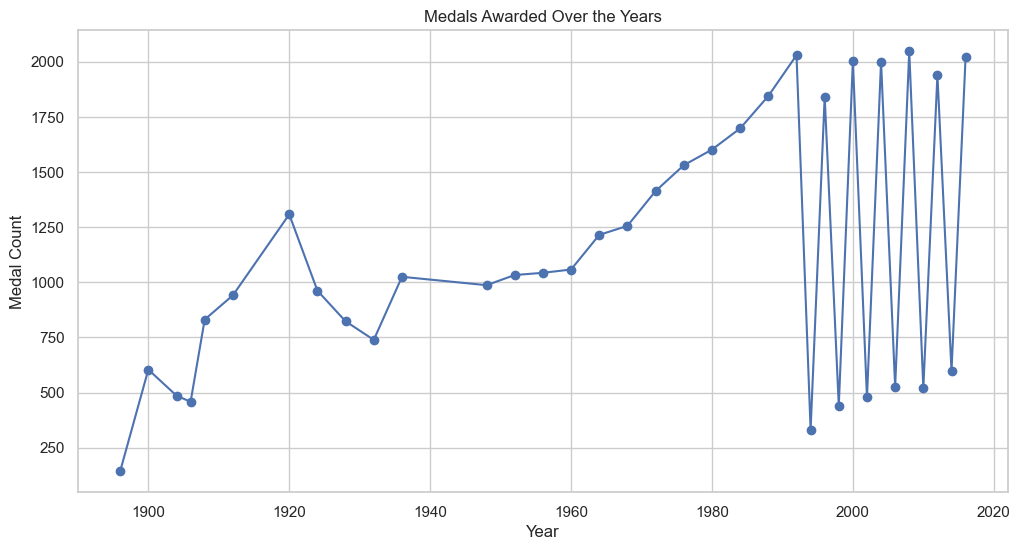

In [35]:
medals_per_year = df_medals.groupby('Year')['Medal'].count()
plt.figure(figsize=(12,6))
plt.plot(medals_per_year.index, medals_per_year.values, marker='o', linestyle='-')
plt.title('Medals Awarded Over the Years')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.grid(True)
plt.show()

## Gender Participation Over Time
Line plots showing the count of **unique athletes** by gender per year.

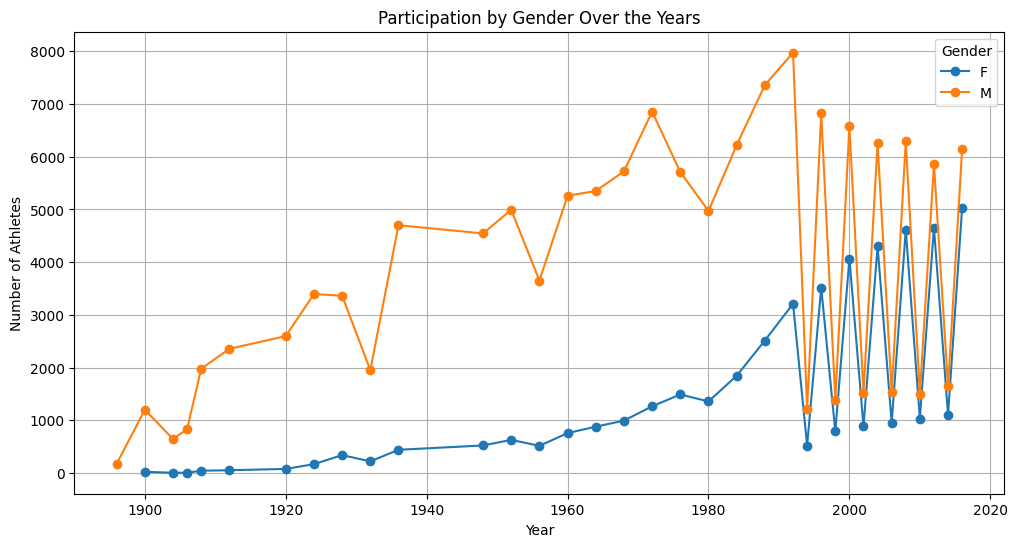

In [18]:
gender_year = df.drop_duplicates(subset=['Year', 'ID'])[['Year', 'Sex']]
gender_counts = gender_year.groupby(['Year', 'Sex']).size().unstack()
gender_counts.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Participation by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.legend(title='Gender')
plt.show()

## Medal Efficiency: Medals per Athlete per Country
Static bar chart of “medal efficiency” defined as total medals divided by number of distinct medal-winning athletes in each country.


C:\Users\91962\AppData\Local\Temp\ipykernel_18524\2101830792.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=efficiency.values, y=efficiency.index, palette='coolwarm')


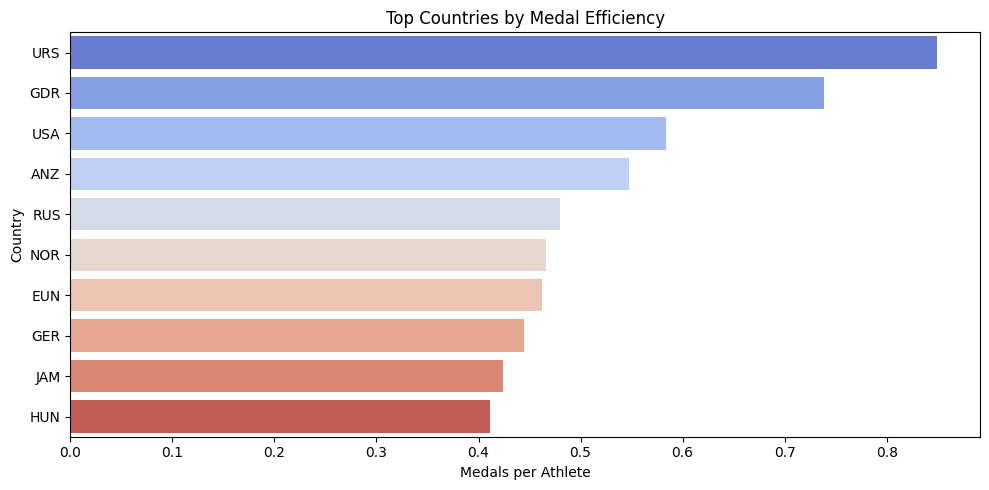

In [19]:
athlete_counts = df.drop_duplicates(subset=['ID', 'NOC'])['NOC'].value_counts()
medal_counts = df_medals['NOC'].value_counts()
efficiency = (medal_counts / athlete_counts).sort_values(ascending=False).dropna().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=efficiency.values, y=efficiency.index, palette='coolwarm')
plt.title('Top Countries by Medal Efficiency')
plt.xlabel('Medals per Athlete')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## Heatmap of Medal Distribution by Sport

A static Seaborn heatmap showing counts of Gold, Silver, and Bronze medals for each sport.


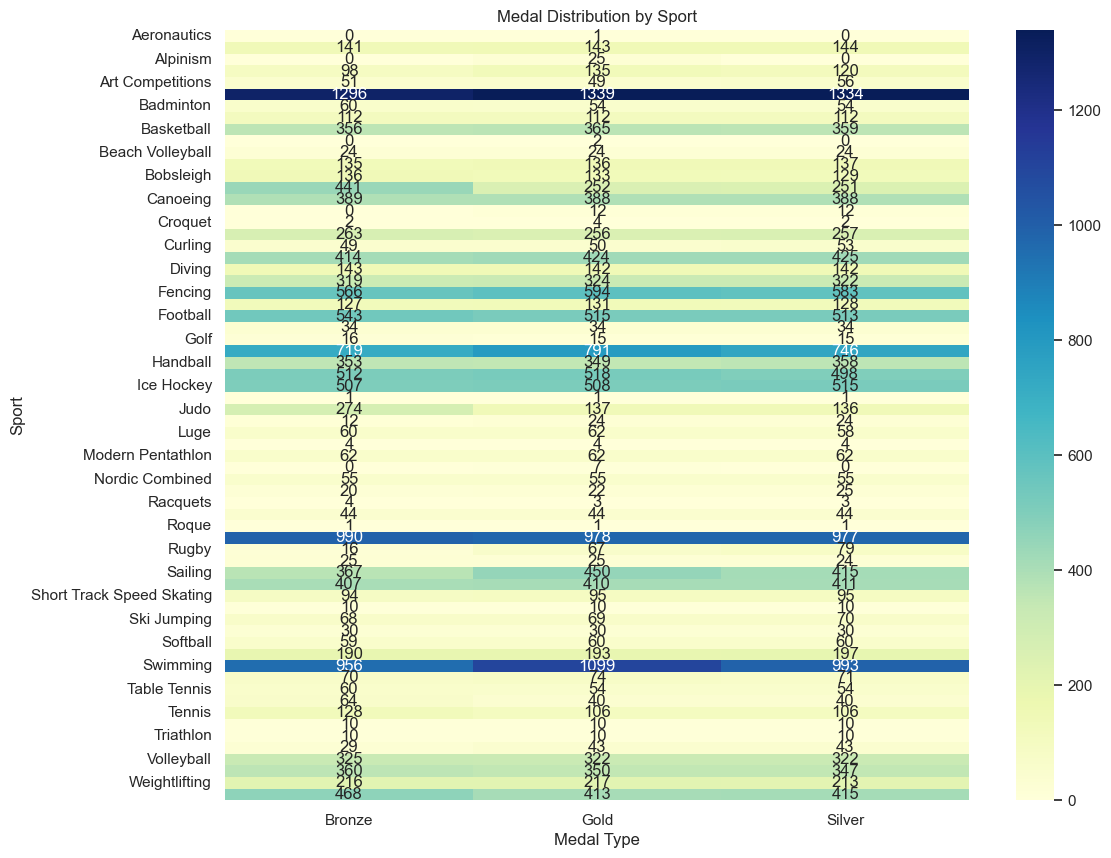

In [37]:
pivot = df_medals.pivot_table(
    index='Sport', columns='Medal', values='ID', aggfunc='count'
).fillna(0)

plt.figure(figsize=(12,10))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Medal Distribution by Sport')
plt.ylabel('Sport')
plt.xlabel('Medal Type')
plt.show()

## Interactive Medal Trends Over Time

Below is an interactive line chart showing how medal counts have changed over time for selected top countries.

**How to interact:**
- Hover over any point to see exact medal counts for that year and country.  
- Click on a country name in the legend to highlight or isolate its trend.  
- Zoom and pan using the toolbar buttons above the chart.


In [45]:
# importing libraries req for interactive plots
import plotly.io as pio
pio.kaleido.scope.default_format = "png"
pio.kaleido.scope.default_width = 800
pio.kaleido.scope.default_height = 600

country_year = df_medals.groupby(['Year', 'NOC'])['Medal'].count().reset_index()
selected = ['USA', 'RUS', 'CHN', 'GBR', 'GER', 'FRA']
fig = px.line(
    country_year[country_year['NOC'].isin(selected)],
    x='Year', y='Medal', color='NOC',
    title='Medal Count Over Time for Selected Countries',
    markers=True
)
fig.update_layout(hovermode='x unified')
fig.show()

AttributeError: 'NoneType' object has no attribute 'default_format'

## Interactive Sunburst of Gender Split per Sport

An interactive sunburst chart showing the breakdown of medals by gender then by sport.  
**Interact:** hover for counts; click segments to zoom in.


In [ ]:
fig = px.sunburst(
    df_medals, path=['Sex', 'Sport'],
    title='Gender Split of Medals by Sport'
)
fig.show()

## World Map of Medal Counts

A Plotly choropleth map of total medal counts by country.  
**Interact:** hover for country totals; zoom/pan to focus.


In [ ]:
country_medals = df_medals.groupby('NOC')['Medal'].count().reset_index()

fig = px.choropleth(
    country_medals,
    locations='NOC', locationmode='ISO-3',
    color='Medal', color_continuous_scale='Plasma',
    title='Total Medals by Country (1896–2021)'
)
fig.show()